#  Muhammad Ghiffari Alfarisy - Institut Teknologi Bandung

## Soal 2: Data IELTS

### Import Necessary Libraries

In [80]:
import pandas as pd
import seaborn as sns

In [81]:
df = pd.read_csv('Data IELTS.csv')

In [82]:
df.head()

,Nama,Pre Test,Progress Test,Final Test,Asal Kota,Unnamed: 5,Unnamed: 6
0,SI-0001,2.5,5.5,6.5,Yogyakarta,NaN,NaN
1,SI-0002,3.0,7.5,7.0,Yogyakarta,NaN,NaN
2,SI-0003,1.5,3.0,5.0,Yogyakarta,NaN,NaN
3,SI-0004,3.0,6.5,6.5,Yogyakarta,NaN,NaN
4,SI-0005,2.0,2.5,5.0,Yogyakarta,NaN,NaN


In [83]:
#Drop kolom yang tidak diperlukan
df.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)
df

,Nama,Pre Test,Progress Test,Final Test,Asal Kota
0,SI-0001,2.5,5.5,6.5,Yogyakarta
1,SI-0002,3.0,7.5,7.0,Yogyakarta
2,SI-0003,1.5,3.0,5.0,Yogyakarta
3,SI-0004,3.0,6.5,6.5,Yogyakarta
4,SI-0005,2.0,2.5,5.0,Yogyakarta
...,...,...,...,...,...
276,SI-0288,5.5,4.5,5.0,Jakarta
277,SI-0289,6.0,5.0,5.5,Yogyakarta
278,SI-0290,7.0,6.5,6.5,Yogyakarta
279,SI-0291,5.5,6.0,4.5,Jakarta


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nama           281 non-null    object 
 1   Pre Test       281 non-null    float64
 2   Progress Test  281 non-null    float64
 3   Final Test     281 non-null    float64
 4   Asal Kota      281 non-null    object 
dtypes: float64(3), object(2)
memory usage: 11.1+ KB


In [85]:
df.describe()

,Pre Test,Progress Test,Final Test
count,281.000000,281.000000,281.000000
mean,4.978648,5.789324,6.023132
std,0.909929,0.972346,0.804229
min,1.500000,1.500000,4.000000
25%,4.500000,5.500000,5.500000
50%,5.000000,6.000000,6.000000
75%,5.500000,6.500000,6.500000
max,7.000000,8.000000,8.000000


### Pertanyaan 1: Apakah terjadi peningkatan skor IELTS yang signifikan pada para students?

In [86]:
pretest_avg = df['Pre Test'].mean()
protest_avg = df['Progress Test'].mean()
fintest_avg = df['Final Test'].mean()

print('Pre Test:'+ str(pretest_avg)) 
print('Progress Test:'+ str(protest_avg))
print('Final Test:'+ str(fintest_avg))

Pre Test:4.9786476868327405
Progress Test:5.789323843416369
Final Test:6.023131672597865


In [87]:
avg = {'Nilai': ['Pre Test', 'Progress Test', 'Final Test'],
       'Rata-rata': [pretest_avg, protest_avg, fintest_avg]}
df_avg=pd.DataFrame(avg)
df_avg

,Nilai,Rata-rata
0,Pre Test,4.978648
1,Progress Test,5.789324
2,Final Test,6.023132


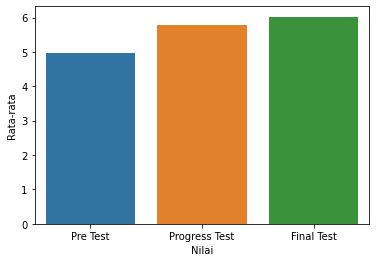

In [88]:
sns.barplot(x=df_avg['Nilai'], y=df_avg['Rata-rata'])

In [89]:
df_avg['Perubahan(%)']=(df_avg['Rata-rata'].pct_change())*100
df_avg

,Nilai,Rata-rata,Perubahan(%)
0,Pre Test,4.978648,NaN
1,Progress Test,5.789324,16.283059
2,Final Test,6.023132,4.038603


Perubahan nilai rata-rata Pre Test, Progress Test, dan Final Test cukup signifikan. Total peningkatan rata-rata nilai IELTS mencapai **20.3%**

### Pertanyaan 2: Apakah ada perbedaan skor Pre Test, Progress Test, dan Final Test ayng signifikan antara students yang berasal dari Jakarta dibandingkan dengan students yang berasal dari Yogyakarta?

In [90]:
#Rata-rata nilai students dari Yogyakarta
df_avg_y= df[df['Asal Kota']=='Yogyakarta'].mean()
df_avg_y

Pre Test         4.733582
Progress Test    5.753731
Final Test       6.029851
dtype: float64

In [91]:
#Rata-rata nilai students dari Jakarta
df_avg_j= df[df['Asal Kota']=='Jakarta'].mean()
df_avg_j

Pre Test         5.202041
Progress Test    5.821769
Final Test       6.017007
dtype: float64

Secara umum, nilai rata-rata disetiap tahapan (Pre Test, Progress Test, Final Test) students yang berasal dari Jakarta lebih baik dibandingkan students yang berasal dari Yogyakarta. Namun, perbedaan nilai rata-rata yang didapat **tidak signifikan.**

In [92]:
#Nilai maks dan min students dari Yogyakarta
df_max_y= df[df['Asal Kota']=='Yogyakarta'].max()
df_min_y= df[df['Asal Kota']=='Yogyakarta'].min()

print(df_max_y)
print(df_min_y)


Nama                SI-0290
Pre Test                  7
Progress Test           7.5
Final Test                8
Asal Kota        Yogyakarta
dtype: object
Nama                SI-0001
Pre Test                1.5
Progress Test           1.5
Final Test                4
Asal Kota        Yogyakarta
dtype: object


In [94]:
#Nilai maks dan min students dari jakarta
df_max_j= df[df['Asal Kota']=='Jakarta'].max()
df_min_j= df[df['Asal Kota']=='Jakarta'].min()

print(df_max_j)
print(df_min_j)

Nama             SI-0292
Pre Test               7
Progress Test          8
Final Test             8
Asal Kota        Jakarta
dtype: object
Nama             SI-0057
Pre Test               3
Progress Test        2.5
Final Test             4
Asal Kota        Jakarta
dtype: object


Perbedaan nilai maksimum dan minimum antara students yang berasal dari Yogyakarta dan Jakarta juga **tidak signifikan**

### Pertanyaan 3: Hal apalagi yang dapat anda sampaikan kepada manajemen terkait evaluasi program Bimbingan IRLTS berdasarkan data tersebut?

In [133]:
df_y = df[df['Asal Kota']=='Yogyakarta']
df_y

,Nama,Pre Test,Progress Test,Final Test,Asal Kota
0,SI-0001,2.5,5.5,6.5,Yogyakarta
1,SI-0002,3.0,7.5,7.0,Yogyakarta
2,SI-0003,1.5,3.0,5.0,Yogyakarta
3,SI-0004,3.0,6.5,6.5,Yogyakarta
4,SI-0005,2.0,2.5,5.0,Yogyakarta
...,...,...,...,...,...
271,SI-0281,6.0,5.5,6.0,Yogyakarta
274,SI-0285,6.5,6.0,6.5,Yogyakarta
275,SI-0286,7.0,7.0,7.0,Yogyakarta
277,SI-0289,6.0,5.0,5.5,Yogyakarta


(1.0, 8.0)

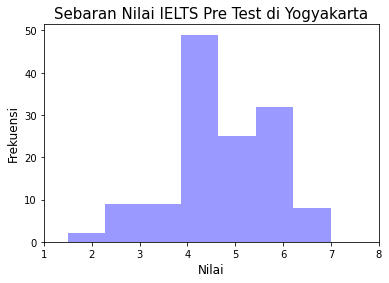

In [141]:
#Yogyakarta Pre Test Histogram
sns.distplot(df_y['Pre Test'], bins=7, color='blue', kde=False)
plt.title('Sebaran Nilai IELTS Pre Test di Yogyakarta', fontsize=15)
plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xlim(1,8)

(1.0, 8.0)

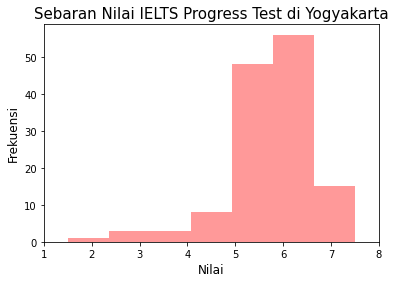

In [140]:
#Yogyakarta Progress Test Histogram
sns.distplot(df_y['Progress Test'], bins=7, color='red', kde=False)
plt.title('Sebaran Nilai IELTS Progress Test di Yogyakarta', fontsize=15)
plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xlim(1,8)

(1.0, 8.0)

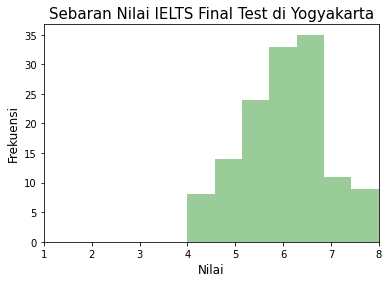

In [142]:
#Yogyakarta Final Test Histogram
sns.distplot(df_y['Final Test'], bins=7, color='green', kde=False)
plt.title('Sebaran Nilai IELTS Final Test di Yogyakarta', fontsize=15)
plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xlim(1,8)

In [137]:
df_j = df[df['Asal Kota']=='Jakarta']
df_j

,Nama,Pre Test,Progress Test,Final Test,Asal Kota
52,SI-0057,4.5,6.0,6.0,Jakarta
53,SI-0058,4.5,5.0,6.0,Jakarta
54,SI-0059,4.5,5.5,6.0,Jakarta
55,SI-0060,4.5,4.5,6.0,Jakarta
56,SI-0061,4.5,5.5,6.0,Jakarta
...,...,...,...,...,...
272,SI-0282,6.5,6.5,6.5,Jakarta
273,SI-0283,6.5,7.0,6.5,Jakarta
276,SI-0288,5.5,4.5,5.0,Jakarta
279,SI-0291,5.5,6.0,4.5,Jakarta


(1.0, 8.0)

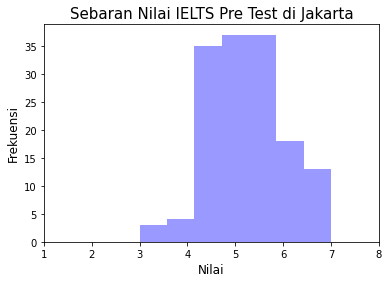

In [146]:
#Jakarta Pre Test Histogram
sns.distplot(df_j['Pre Test'], bins=7, color='blue', kde=False)
plt.title('Sebaran Nilai IELTS Pre Test di Jakarta', fontsize=15)
plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xlim(1,8)

(1.0, 8.0)

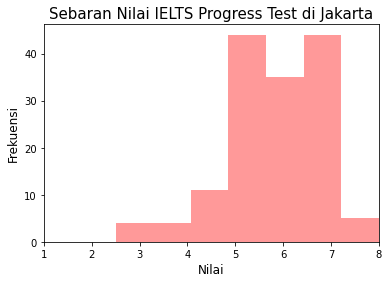

In [145]:
#Jakarta Progress Test Histogram
sns.distplot(df_j['Progress Test'], bins=7, color='red', kde=False)
plt.title('Sebaran Nilai IELTS Progress Test di Jakarta', fontsize=15)
plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xlim(1,8)

(1.0, 8.0)

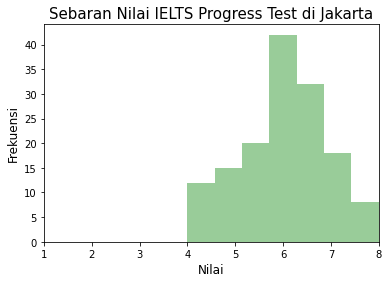

In [148]:
#Jakarta Final Test Histogram
sns.distplot(df_j['Final Test'], bins=7, color='green', kde=False)
plt.title('Sebaran Nilai IELTS Progress Test di Jakarta', fontsize=15)
plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xlim(1,8)

Pada histogram yang sudah ditampilkan diatas, dapat disimpulkan bahwa distribusi nilai IELTS disetiap tahapan test baik di Yogyakarta maupun Jakarta mengalami **peningkatan**